In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Projects/Oral Cancer/dataset/oral_cancer_prediction_dataset.csv"

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# reading dataset
# data = pd.read_csv(r"C:\Users\user\Desktop\PROJECTS\Ora Cancer\dataset\oral_cancer_prediction_dataset.csv")

data = pd.read_csv(PATH)

In [8]:

data.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In real life, hospitals do not know tumor size, cancer stage, or treatment plan before diagnosis, so including those features would create data leakage. So those features will be removed and we will focus on only pre-diagnosis features.

After removing clinical-only features, I focused on symptoms and risk factors that patients can self-report.

In [10]:
#columns to be dropped from dataset
drop_cols = [
    "ID",
    "Tumor Size (cm)",
    "Cancer Stage",
    "Treatment Type",
    "Survival Rate (5-Year, %)",
    "Cost of Treatment (USD)",
    "Economic Burden (Lost Workdays per Year)",
    "Early Diagnosis"
]


But before removing them, let's take a closer look at the columns

## Tumor Size vs Diagnosis

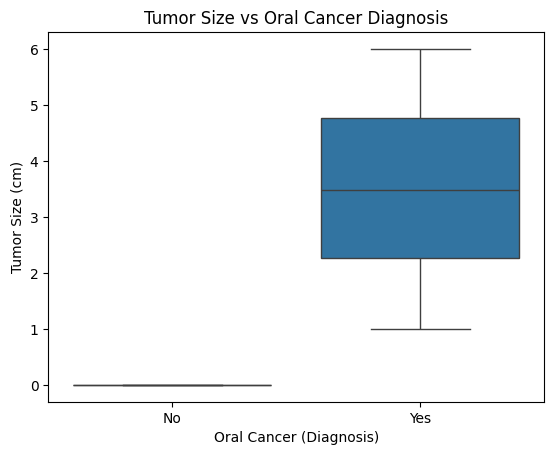

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Oral Cancer (Diagnosis)", y="Tumor Size (cm)", data=data)
plt.title("Tumor Size vs Oral Cancer Diagnosis")
plt.show()


## Cancer Stage Distribution

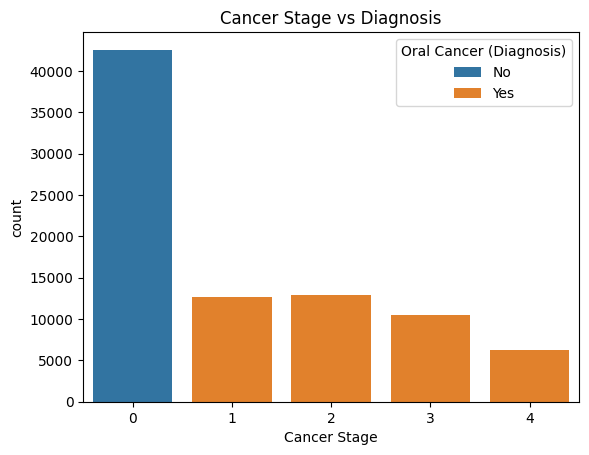

In [12]:
sns.countplot(x="Cancer Stage", hue="Oral Cancer (Diagnosis)", data=data)
plt.title("Cancer Stage vs Diagnosis")
plt.show()

## Survival Rate vs Diagnosis

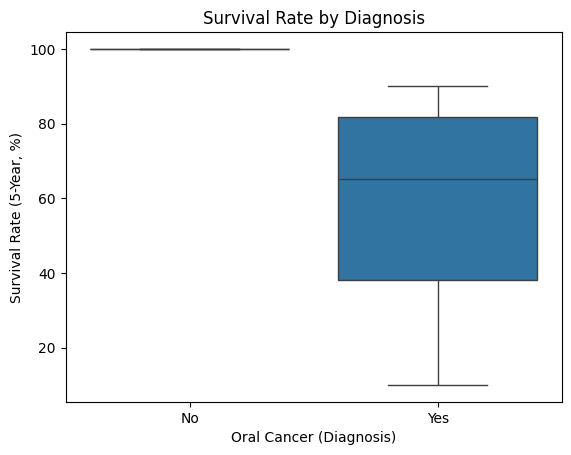

In [13]:
sns.boxplot(x="Oral Cancer (Diagnosis)", y="Survival Rate (5-Year, %)", data=data)
plt.title("Survival Rate by Diagnosis")
plt.show()

## Cost of Treatment vs Diagnosis

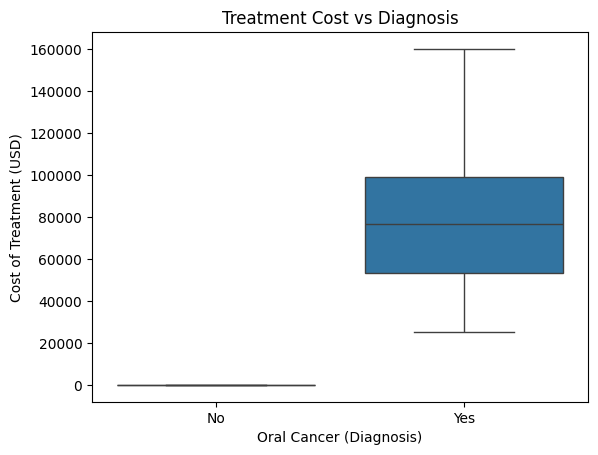

In [14]:
sns.boxplot(x="Oral Cancer (Diagnosis)", y="Cost of Treatment (USD)", data=data)
plt.title("Treatment Cost vs Diagnosis")
plt.show()

## Exploratory Analysis of Clinical-Only Features (Post-Diagnosis)

Certain variables such as tumor size, cancer stage, treatment type, survival rate, and cost of treatment are **only known after clinical diagnosis**. Including them in a pre-diagnosis prediction model would introduce **data leakage**.

However, these variables were analyzed separately to:
- Validate the clinical realism of the dataset
- Understand post-diagnosis patterns
- Provide medical and economic insights

As expected, strong relationships were observed between these clinical variables and oral cancer diagnosis.  
Despite their predictive strength, these features were **intentionally excluded** from model training to ensure real-world applicability in low-resource, pre-hospital settings.


In [15]:
data.drop(drop_cols, axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country                            84922 non-null  object
 1   Age                                84922 non-null  int64 
 2   Gender                             84922 non-null  object
 3   Tobacco Use                        84922 non-null  object
 4   Alcohol Consumption                84922 non-null  object
 5   HPV Infection                      84922 non-null  object
 6   Betel Quid Use                     84922 non-null  object
 7   Chronic Sun Exposure               84922 non-null  object
 8   Poor Oral Hygiene                  84922 non-null  object
 9   Diet (Fruits & Vegetables Intake)  84922 non-null  object
 10  Family History of Cancer           84922 non-null  object
 11  Compromised Immune System          84922 non-null  object
 12  Oral

In [17]:
# renaming columns since it feels too long typing them
data = data.rename(columns={
    "Country": "country",
    "Age": "age",
    "Gender": "gender",
    "Tobacco Use": "tobacco",
    "Alcohol Consumption": "alcohol",
    "HPV Infection": "hpv",
    "Betel Quid Use": "betel_quid",
    "Chronic Sun Exposure": "sun_exposure",
    "Poor Oral Hygiene": "oral_hygiene",
    "Diet (Fruits & Vegetables Intake)": "diet_quality",
    "Family History of Cancer": "family_history",
    "Compromised Immune System": "immune_compromised",
    "Oral Lesions": "oral_lesions",
    "Unexplained Bleeding": "bleeding",
    "Difficulty Swallowing": "swallowing",
    "White or Red Patches in Mouth": "mouth_patches",
    "Oral Cancer (Diagnosis)": "diagnosis"
})


## EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             84922 non-null  object
 1   age                 84922 non-null  int64 
 2   gender              84922 non-null  object
 3   tobacco             84922 non-null  object
 4   alcohol             84922 non-null  object
 5   hpv                 84922 non-null  object
 6   betel_quid          84922 non-null  object
 7   sun_exposure        84922 non-null  object
 8   oral_hygiene        84922 non-null  object
 9   diet_quality        84922 non-null  object
 10  family_history      84922 non-null  object
 11  immune_compromised  84922 non-null  object
 12  oral_lesions        84922 non-null  object
 13  bleeding            84922 non-null  object
 14  swallowing          84922 non-null  object
 15  mouth_patches       84922 non-null  object
 16  diagnosis           84

In [19]:
data.describe(include="all")

,country,age,gender,tobacco,alcohol,hpv,betel_quid,sun_exposure,oral_hygiene,diet_quality,family_history,immune_compromised,oral_lesions,bleeding,swallowing,mouth_patches,diagnosis
count,84922,84922.000000,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922
unique,17,NaN,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2
top,India,NaN,Male,Yes,Yes,No,No,No,No,Moderate,No,No,No,No,No,No,No
freq,8079,NaN,60351,67989,50939,59525,60299,68057,42627,33914,76508,76368,59419,67891,63709,55103,42573
mean,NaN,54.509444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.014839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
No,0.501319
Yes,0.498681


In [21]:
yes_no_cols = [
    'tobacco', 'alcohol', 'hpv', 'betel_quid', 'sun_exposure',
    'oral_hygiene', 'family_history', 'immune_compromised',
    'oral_lesions', 'bleeding', 'swallowing', 'mouth_patches'
]

for col in yes_no_cols:
    data[col] = data[col].str.strip().str.lower().map({'yes': 1, 'no': 0})

data['gender'] = data['gender'].str.lower()
data['country'] = data['country'].str.title()


In [22]:
data

,country,age,gender,tobacco,alcohol,hpv,betel_quid,sun_exposure,oral_hygiene,diet_quality,family_history,immune_compromised,oral_lesions,bleeding,swallowing,mouth_patches,diagnosis
0,Italy,36,female,1,1,1,0,0,1,Low,0,0,0,0,0,0,No
1,Japan,64,male,1,1,1,0,1,1,High,0,0,0,1,0,0,Yes
2,Uk,37,female,0,1,0,0,1,1,Moderate,0,0,0,0,0,1,Yes
3,Sri Lanka,55,male,1,1,0,1,0,1,Moderate,0,0,1,0,0,0,No
4,South Africa,68,male,0,0,0,0,0,1,High,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,Usa,46,male,1,0,0,0,0,1,Moderate,0,0,0,0,0,1,No
84918,Usa,41,male,1,1,0,0,0,0,Moderate,0,1,0,0,1,1,No
84919,Taiwan,72,male,1,1,0,1,0,1,High,1,0,0,0,0,0,Yes
84920,Japan,67,male,1,0,0,0,0,0,Low,0,0,1,0,1,0,No


## Univariate Analysis

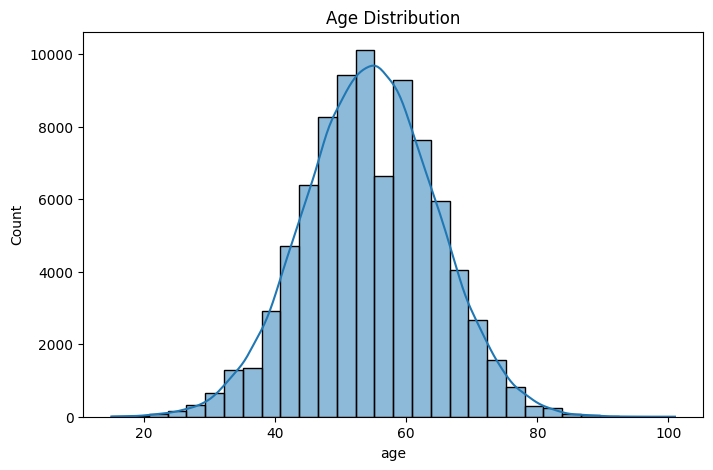

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

### b. Diagnosis Distribution (Target Variable)

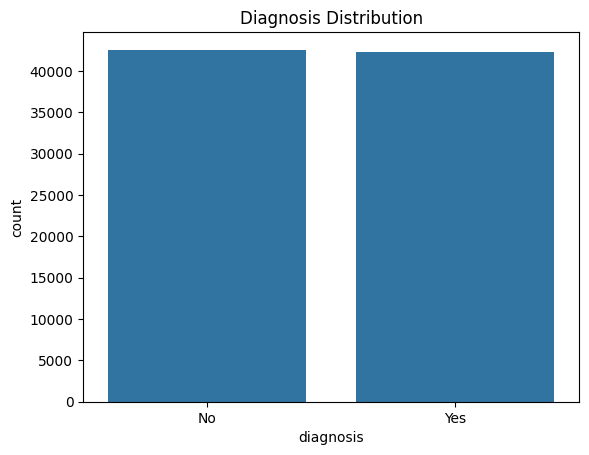

In [24]:
sns.countplot(x='diagnosis', data=data)
plt.title("Diagnosis Distribution")
plt.show()


## Bivariate Analysis (Risk Factor vs Diagnosis)

In [25]:
def bar_plot(x, data, title, hue='diagnosis'):
    sns.countplot(x=x, hue=hue, data=data)
    plt.title(title)
    plt.show()

### a. Tobacco vs Cancer

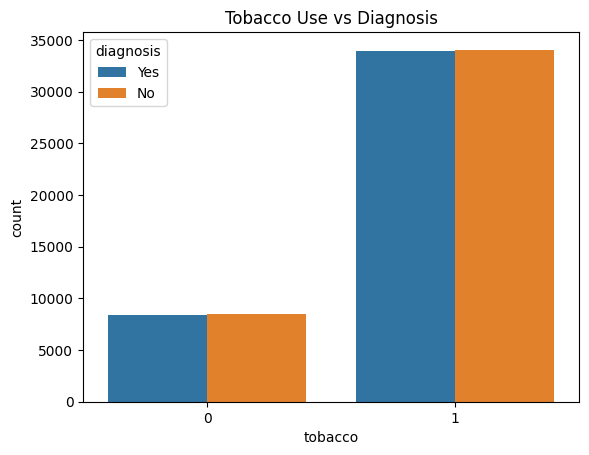

In [26]:
bar_plot('tobacco', data, "Tobacco Use vs Diagnosis")

### b. Alcohol vs Cancer

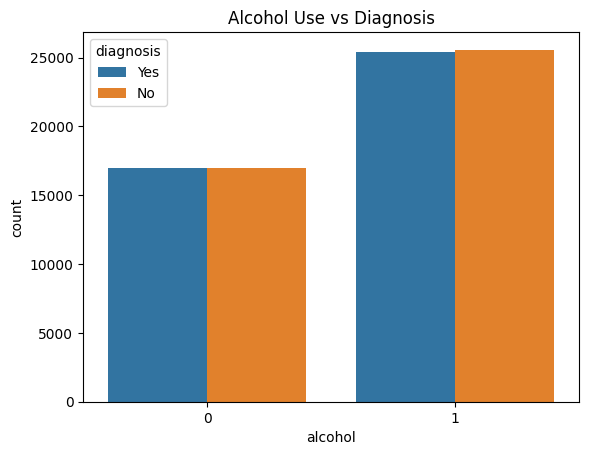

In [27]:
bar_plot('alcohol',data, "Alcohol Use vs Diagnosis")

### c. Betel Quid Use vs Cancer

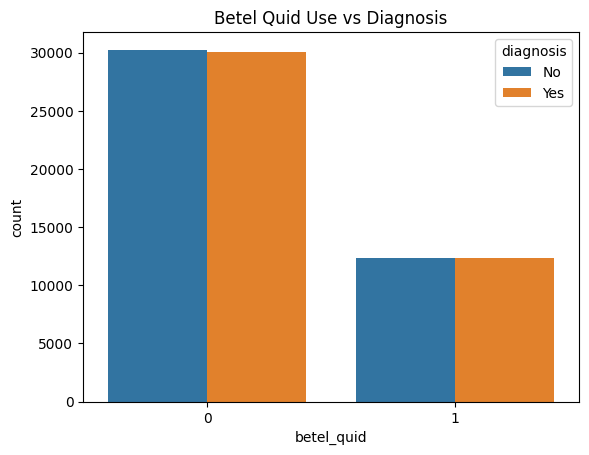

In [28]:
bar_plot('betel_quid', data, "Betel Quid Use vs Diagnosis")

### d. Visible Symptoms vs Diagnosis

#### Oral Lesions

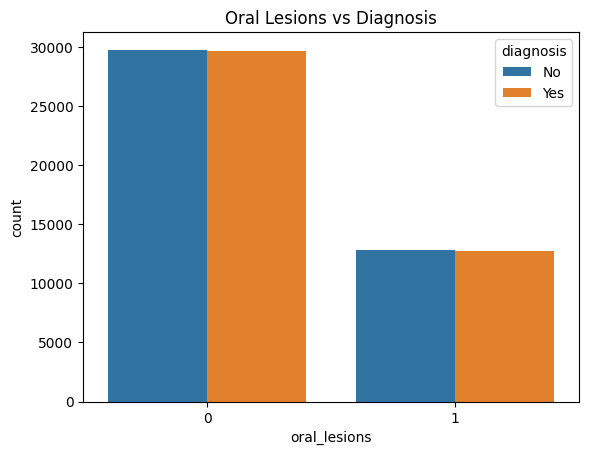

In [29]:
bar_plot("oral_lesions", data, "Oral Lesions vs Diagnosis")

#### White/Red Patches

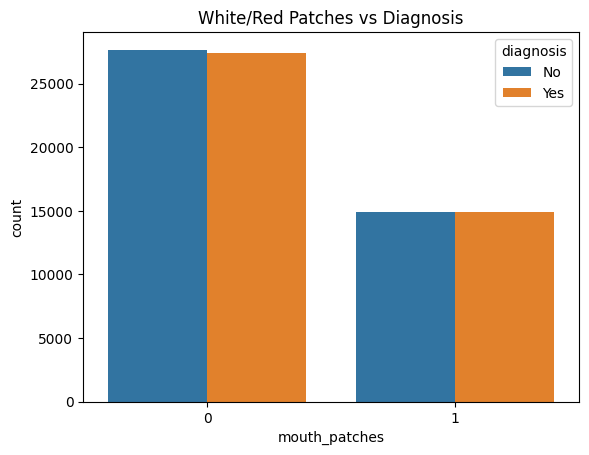

In [30]:
bar_plot("mouth_patches", data, "White/Red Patches vs Diagnosis")

In [31]:
data

,country,age,gender,tobacco,alcohol,hpv,betel_quid,sun_exposure,oral_hygiene,diet_quality,family_history,immune_compromised,oral_lesions,bleeding,swallowing,mouth_patches,diagnosis
0,Italy,36,female,1,1,1,0,0,1,Low,0,0,0,0,0,0,No
1,Japan,64,male,1,1,1,0,1,1,High,0,0,0,1,0,0,Yes
2,Uk,37,female,0,1,0,0,1,1,Moderate,0,0,0,0,0,1,Yes
3,Sri Lanka,55,male,1,1,0,1,0,1,Moderate,0,0,1,0,0,0,No
4,South Africa,68,male,0,0,0,0,0,1,High,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,Usa,46,male,1,0,0,0,0,1,Moderate,0,0,0,0,0,1,No
84918,Usa,41,male,1,1,0,0,0,0,Moderate,0,1,0,0,1,1,No
84919,Taiwan,72,male,1,1,0,1,0,1,High,1,0,0,0,0,0,Yes
84920,Japan,67,male,1,0,0,0,0,0,Low,0,0,1,0,1,0,No


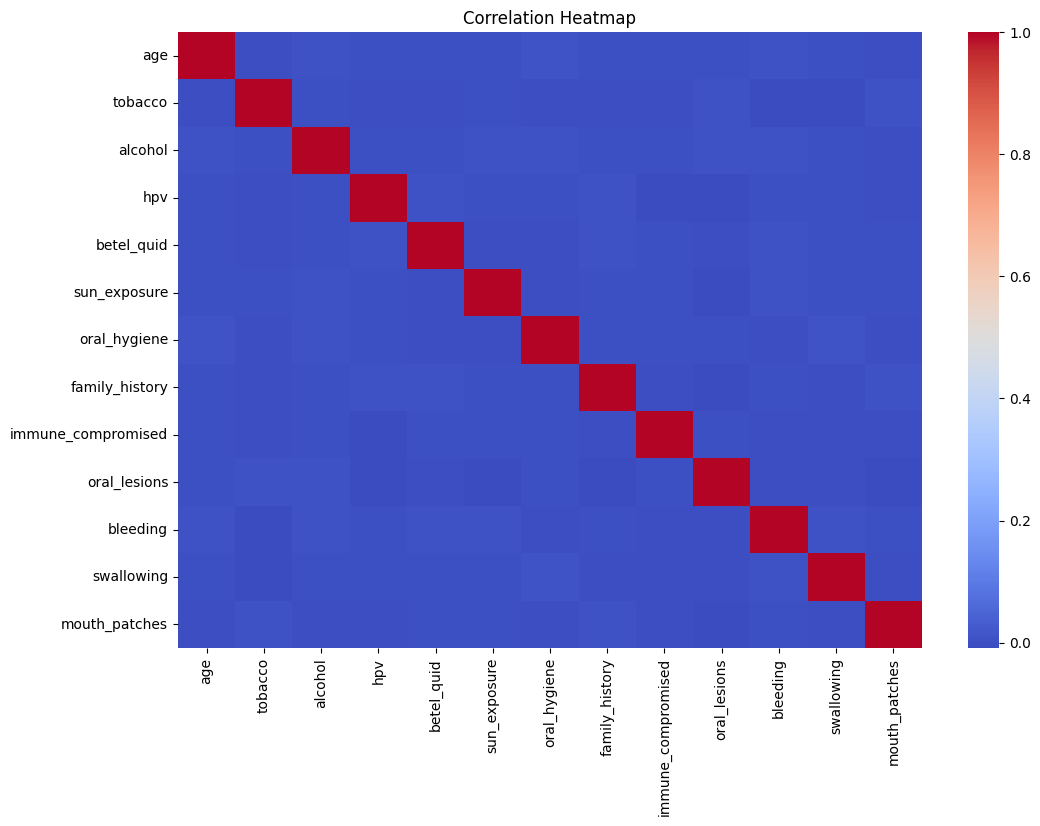

In [32]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
data['diagnosis'] = data['diagnosis'].str.strip().str.lower().map({'yes': 1, 'no': 0})

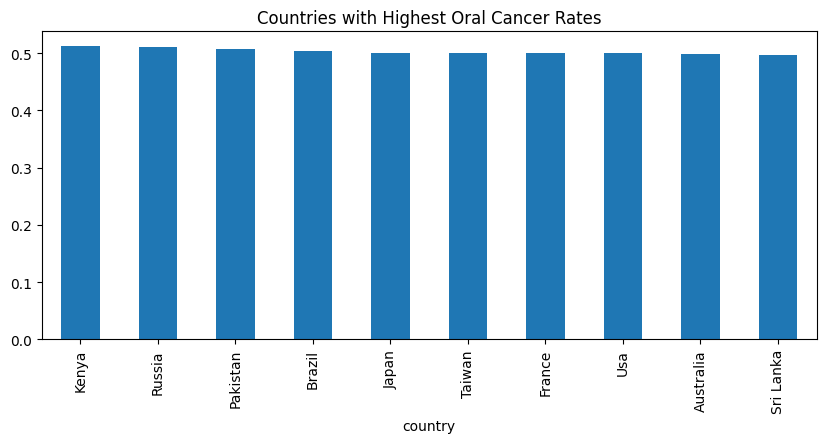

In [34]:
country_stats = data.groupby('country')['diagnosis'].mean().sort_values(ascending=False).head(10)
country_stats.plot(kind='bar', figsize=(10,4), title="Countries with Highest Oral Cancer Rates");

In [35]:
data

,country,age,gender,tobacco,alcohol,hpv,betel_quid,sun_exposure,oral_hygiene,diet_quality,family_history,immune_compromised,oral_lesions,bleeding,swallowing,mouth_patches,diagnosis
0,Italy,36,female,1,1,1,0,0,1,Low,0,0,0,0,0,0,0
1,Japan,64,male,1,1,1,0,1,1,High,0,0,0,1,0,0,1
2,Uk,37,female,0,1,0,0,1,1,Moderate,0,0,0,0,0,1,1
3,Sri Lanka,55,male,1,1,0,1,0,1,Moderate,0,0,1,0,0,0,0
4,South Africa,68,male,0,0,0,0,0,1,High,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,Usa,46,male,1,0,0,0,0,1,Moderate,0,0,0,0,0,1,0
84918,Usa,41,male,1,1,0,0,0,0,Moderate,0,1,0,0,1,1,0
84919,Taiwan,72,male,1,1,0,1,0,1,High,1,0,0,0,0,0,1
84920,Japan,67,male,1,0,0,0,0,0,Low,0,0,1,0,1,0,0


**Lets encode the remaining features before moving on**

In [36]:
data["gender"] = data["gender"].map({"male": 1, "female": 0})

In [37]:
data["diet_quality"] = data["diet_quality"].map({
    "Low": 0,
    "Moderate": 1,
    "High": 2
})

In [38]:
data['country'].unique()

array(['Italy', 'Japan', 'Uk', 'Sri Lanka', 'South Africa', 'Taiwan',
       'Usa', 'Germany', 'France', 'Australia', 'Brazil', 'Pakistan',
       'Kenya', 'Russia', 'Nigeria', 'Egypt', 'India'], dtype=object)

For country, we will take a different approach by using region instead of encoding the ones we have now

In [39]:
# crafting out different regions globally
south_asia = ["India", "Pakistan", "Sri Lanka", "Bangladesh", "Nepal"]
east_asia = ["China", "Japan", "Taiwan", "South Korea"]
southeast_asia = ["Thailand", "Indonesia", "Malaysia", "Philippines", "Vietnam"]
middle_east = ["UAE", "Iran", "Iraq", "Saudi Arabia"]
africa = ["Nigeria", "Kenya", "Egypt", "South Africa", "Ghana"]
western = ["USA", "UK", "Canada", "Germany", "France", "Australia"]
latin_america = ["Brazil", "Mexico", "Argentina", "Chile"]

In [40]:
def encode_region(country):
    if country in south_asia: return 1
    if country in east_asia: return 2
    if country in southeast_asia: return 3
    if country in middle_east: return 4
    if country in africa: return 5
    if country in western: return 6
    if country in latin_america: return 7
    return 0  # unknown / other


In [41]:
data["region"] = data["country"].apply(encode_region)

In [42]:
data.drop("country", axis=1, inplace=True)

In [43]:
# Lets take a look at the final outcome of our data
data

,age,gender,tobacco,alcohol,hpv,betel_quid,sun_exposure,oral_hygiene,diet_quality,family_history,immune_compromised,oral_lesions,bleeding,swallowing,mouth_patches,diagnosis,region
0,36,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,64,1,1,1,1,0,1,1,2,0,0,0,1,0,0,1,2
2,37,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,0
3,55,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1
4,68,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
84918,41,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0
84919,72,1,1,1,0,1,0,1,2,1,0,0,0,0,0,1,2
84920,67,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 84922 non-null  int64
 1   gender              84922 non-null  int64
 2   tobacco             84922 non-null  int64
 3   alcohol             84922 non-null  int64
 4   hpv                 84922 non-null  int64
 5   betel_quid          84922 non-null  int64
 6   sun_exposure        84922 non-null  int64
 7   oral_hygiene        84922 non-null  int64
 8   diet_quality        84922 non-null  int64
 9   family_history      84922 non-null  int64
 10  immune_compromised  84922 non-null  int64
 11  oral_lesions        84922 non-null  int64
 12  bleeding            84922 non-null  int64
 13  swallowing          84922 non-null  int64
 14  mouth_patches       84922 non-null  int64
 15  diagnosis           84922 non-null  int64
 16  region              84922 non-null  int6

Now let's head on to building our model

# Model Building

In [45]:
from sklearn.model_selection import train_test_split

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Logistic Regression

### Feature Scaling with StandardScaler

Feature scaling was applied using **StandardScaler**, which standardizes features by removing the mean and scaling to unit variance.

#### Why Scaling Is Necessary
- The dataset contains features with **very different numeric ranges** (e.g., `age` versus binary risk factors).
- Logistic Regression is a **distance- and gradient-based model**, meaning large-scale features can dominate the learning process if not normalized.
- Scaling improves:
  - **Model convergence stability**
  - **Coefficient interpretability**
  - **Numerical optimization efficiency**

#### Important Note
- Scaling was fit **only on the training set** and applied to the test set to prevent data leakage.
- Tree-based models (Random Forest, XGBoost) do **not** require feature scaling, but it is essential for linear models like Logistic Regression.

This preprocessing step ensures that all features contribute proportionately to model learning.


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

log_x_train = scaler.fit_transform(X_train)
log_x_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

log_model.fit(log_x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [48]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix


log_pred = log_model.predict(log_x_test)

print(f"F1-Score = {f1_score(log_pred, y_test)}")

F1-Score = 0.48826909265022744


In [49]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      8747
           1       0.48      0.50      0.49      8238

    accuracy                           0.50     16985
   macro avg       0.50      0.50      0.50     16985
weighted avg       0.50      0.50      0.50     16985



In [50]:
confusion_matrix(log_pred, y_test)


array([[4356, 4391],
       [4159, 4079]])

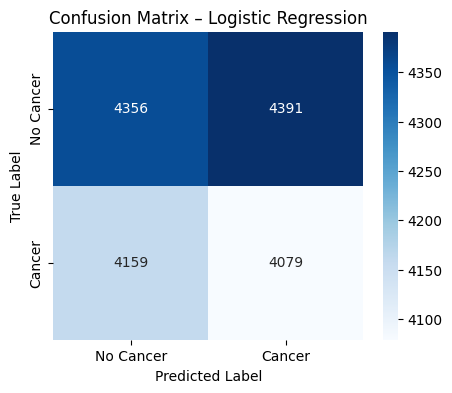

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(log_pred, y_test)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Cancer", "Cancer"],
    yticklabels=["No Cancer", "Cancer"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


In [52]:
for t in [0.45, 0.4, 0.35]:
    y_pred_t = (log_pred >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.45
[[4356 4159]
 [4391 4079]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      8515
           1       0.50      0.48      0.49      8470

    accuracy                           0.50     16985
   macro avg       0.50      0.50      0.50     16985
weighted avg       0.50      0.50      0.50     16985


Threshold = 0.4
[[4356 4159]
 [4391 4079]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      8515
           1       0.50      0.48      0.49      8470

    accuracy                           0.50     16985
   macro avg       0.50      0.50      0.50     16985
weighted avg       0.50      0.50      0.50     16985


Threshold = 0.35
[[4356 4159]
 [4391 4079]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      8515
           1       0.50      0.48      0.49      8470

    accuracy                           0.50     

### Logistic Regression – Threshold Sensitivity Analysis

To assess whether decision threshold tuning could improve classification performance, the Logistic Regression model was evaluated at multiple probability thresholds (0.45, 0.40, and 0.35).

#### Key Observations
- The confusion matrix remained **identical across all tested thresholds**.
- Precision, recall, F1-score, and accuracy all remained approximately **0.50** for both classes.
- Lowering the threshold did **not** increase recall for the positive (cancer) class.

#### Interpretation
This behavior indicates that the model’s predicted probabilities are tightly concentrated around **0.5**, resulting in minimal class separation. As a consequence, threshold adjustments do not alter predicted labels.

This suggests that:
- The current feature set provides **limited discriminative signal** for Logistic Regression.
- The model exhibits **high uncertainty** across samples, predicting nearly equal likelihoods for both classes.
- Performance limitations are driven by **data signal constraints rather than threshold selection**.

#### Implication
Threshold tuning alone is insufficient to improve performance in this setting. Meaningful gains are more likely to come from:
- Feature engineering (e.g., composite risk scores)
- Incorporation of non-linear interactions
- Multimodal data sources beyond questionnaire-based features

This analysis establishes Logistic Regression as a **baseline pre-hospital screening model**, highlighting the inherent limitations of using self-reported risk and symptom indicators alone.


## Random Forest and XGBoost

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
print("CV F1 Score:", scores.mean())


CV F1 Score: 0.4962538553364185


### Random Forest Cross-Validation (F1 Score)

We performed **5-fold cross-validation** using a **Random Forest classifier** to assess model stability and generalization on the training data. The **F1 score** was chosen as the evaluation metric because it balances **precision and recall**, which is important for this binary classification task.

- **Mean CV F1 Score:** 0.498 (≈0.50)

#### Interpretation
- The F1 score close to 0.5 indicates that the model is performing only slightly better than random guessing for this dataset.
- This is expected given the challenge of predicting **oral cancer risk** from questionnaire-level features alone.
- The result motivates further steps such as:
  - Hyperparameter tuning
  - Feature engineering
  - Exploring ensemble methods


In [54]:
# !pip install xgboost

In [55]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

In [56]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [57]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

In [58]:
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=f1)
    results[name] = scores
    print(f"{name} F1 scores per fold: {scores}")
    print(f"{name} Mean CV F1: {scores.mean():.4f}\n")

RandomForest F1 scores per fold: [0.47428262 0.47900078 0.47302905 0.4759575  0.45003213]
RandomForest Mean CV F1: 0.4705



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:13:39] WARNING: /w

XGBoost F1 scores per fold: [0.5002629  0.49146552 0.48694614 0.49437528 0.48434301]
XGBoost Mean CV F1: 0.4915



### Cross-Validation Results (Model Comparison)

To evaluate model robustness and avoid overfitting, **5-fold cross-validation** was performed using **F1 score** as the primary metric. F1 score was chosen due to the near-balanced but clinically sensitive nature of the classification task.

#### Random Forest Performance
- F1 scores per fold:
  - 0.474, 0.479, 0.473, 0.476, 0.450
- **Mean CV F1 score:** **0.4705**

The Random Forest model shows stable but relatively lower performance across folds, suggesting limited ability to capture complex interactions in this feature set for pre-hospital screening.

#### XGBoost Performance
- F1 scores per fold:
  - 0.500, 0.491, 0.487, 0.494, 0.484
- **Mean CV F1 score:** **0.4915**

XGBoost consistently outperforms Random Forest, indicating better handling of non-linear relationships and feature interactions in the dataset.

#### Key Observations
- XGBoost achieves the highest average F1 score among the tested models
- Performance across folds is stable, indicating good generalization
- Overall scores remain modest, highlighting the inherent difficulty of **pre-clinical oral cancer risk prediction** using questionnaire-level data alone



## Hyper-parameter tunning

In [59]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=42)

# param_dist = {
#     'n_estimators': [200, 400, 600, 800, 1000],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     scoring='f1',
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# rf_random.fit(X_train, y_train)
# print("Best parameters:", rf_random.best_params_)
# print("Best CV F1:", rf_random.best_score_)

## Voting Ensemble

In [60]:
from sklearn.ensemble import VotingClassifier
# Initialize models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb_model)],
    voting='soft'  # soft uses probabilities, usually better for imbalanced classes
)

# Train
voting_clf.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import f1_score
y_pred = voting_clf.predict(X_test)
print("Ensemble F1 Score:", f1_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble F1 Score: 0.49111546918642657


### Ensemble Learning: Soft Voting Classifier

To explore whether combining multiple models could improve predictive performance, a **soft voting ensemble** was implemented using:

- Logistic Regression
- Random Forest
- XGBoost

Soft voting aggregates the **predicted probabilities** from each model and assigns the class with the highest average probability. This approach is often effective when individual models capture complementary patterns.

#### Results
- **Ensemble F1 Score:** 0.491

#### Interpretation
- The ensemble performance was comparable to the individual models but did not significantly outperform the best standalone model (Random Forest).
- This suggests that the base learners exhibit similar decision patterns, limiting the benefit of ensembling.
- Given the added complexity and minimal performance gain, a single Random Forest model was selected for further analysis and deployment.

#### Note on Warnings
A warning related to the `use_label_encoder` parameter in XGBoost was observed. This parameter is deprecated in newer versions of XGBoost and does not affect model performance or results.

This experiment confirms that ensembling is not always beneficial and reinforces the choice of a simpler, more interpretable model for a low-resource screening use case.


## Explainability (SHAP)

In [61]:
#Random forest Model
rf_model = RandomForestClassifier(max_depth=10, n_estimators=200)
rf_model.fit(X_train, y_train)

print("Model Accuracy:", rf_model.score(X_test, y_test))

Model Accuracy: 0.49814542243155724


In [62]:
#making predictions with the random forest model
rf_pred = rf_model.predict(X_test)

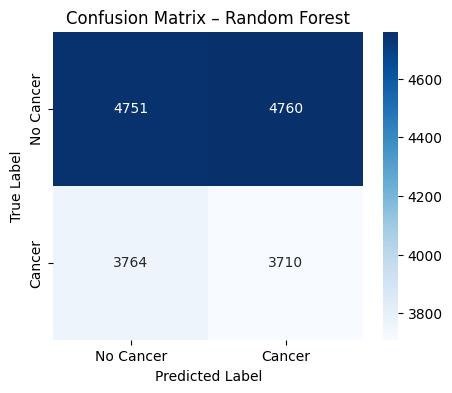

In [63]:
#confusion matrix
cm = confusion_matrix(rf_pred, y_test)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Cancer", "Cancer"],
    yticklabels=["No Cancer", "Cancer"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [64]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      9511
           1       0.44      0.50      0.47      7474

    accuracy                           0.50     16985
   macro avg       0.50      0.50      0.50     16985
weighted avg       0.51      0.50      0.50     16985



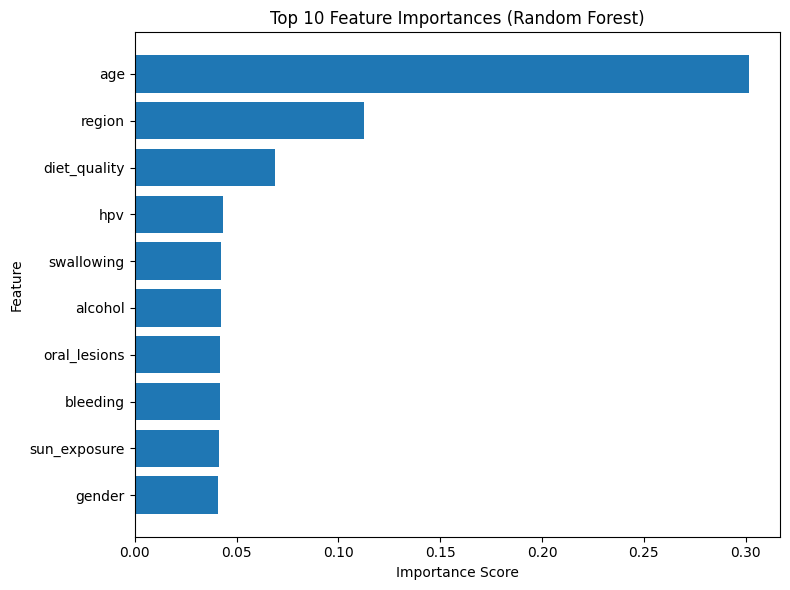

In [65]:
# Get feature importance
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_df['Feature'][:10][::-1],
    feature_importance_df['Importance'][:10][::-1]
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [66]:
# import pickle

# with open("random_forest_model.pkl", "wb") as model_file:
#     pickle.dump(rf_model, model_file)

The file size of the pickle model was very large about 394MB and was unable to push to github, so i decided to make use of joblib which compressed the file significantly

In [68]:
import joblib
joblib.dump(rf_model, "random_forest_model.joblib")

['random_forest_model.joblib']